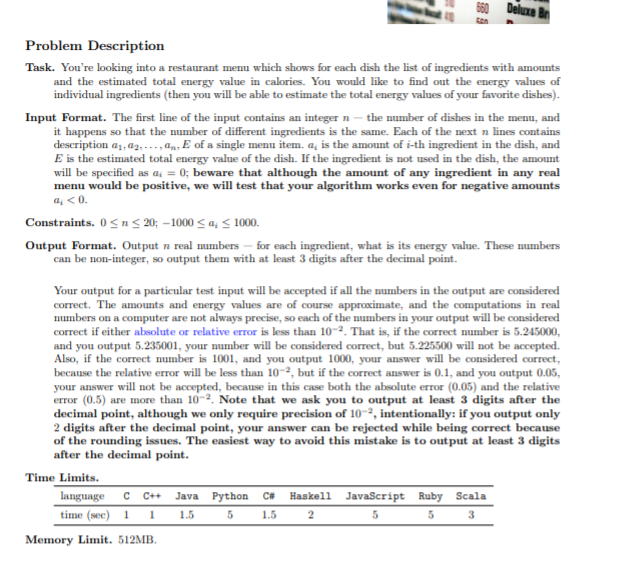

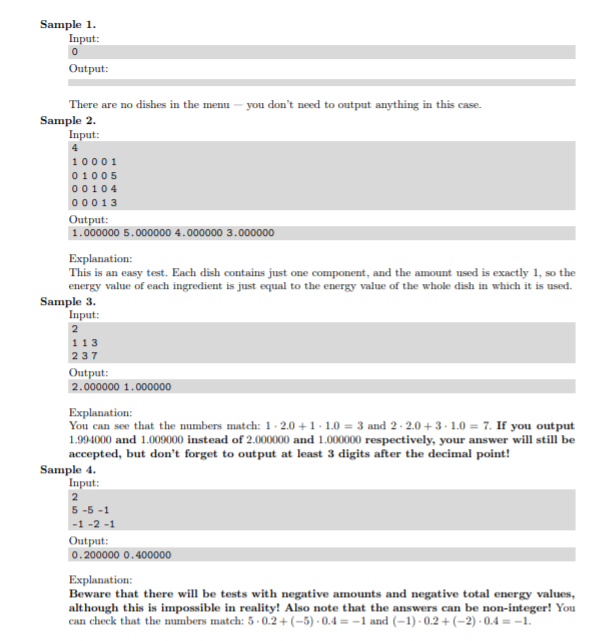

ES un sistema de ecuaciones que hay que resolver con Gauss Jordan

In [167]:
''' Gauss Jordan convertir a row echelon'''
import numpy as np



def swap(matriz,i,j):
    ''' swapea el renglon i y el j de la matriz'''
    matriz[i] , matriz[j] = matriz[j] , matriz[i]

def multiplica(matriz,i,c):
    '''Multiplica el renglon i por c'''
    matriz[i] = [x*c for x in matriz[i]]

def suma(matriz,i,j,c):
    '''le suma al renglon j el renglon i'''
    listoflists = [[x*c for x in matriz[i]],matriz[j]]
    matriz[j] = [sum(x) for x in zip(*listoflists)]




def encuentrapivote(matriz,pivotes,n,m):
    ''' encuentra el renglon del siguiente pivote, dado que ya encontramos n pivs'''
    # lo que hace es encontrar el renglon con la menor cantidad de 0s
    #por ahora, la menor cantidad es tener infinitos 
    mejor = np.inf
    #checa todos los renglones que no son pivotes(los pivotes ya los puso hasta arriba)
    for i in range(pivotes,n):
        #empieza en el iesimo renglon en el pivotesimo columna (porque ya sabe que todas
        #las columnas a la izquierda deben de ser ceros)
        j = pivotes
        #mientras tengamos un 0
        while j<m and matriz[i][j] == 0:
            #vamos aumentando la j (recorremos hacia la derecha)
            j=j+1
            if j ==m-1:
                return(-1)
                break
        #eventualmente, llegamos al primer no cero. Entonces, j cont'o la cantidad de ceros
        #desde la columna pivotesima. 
        #si el i-esimo renglon tiene menos 0s que el mejor, actualiza el mejor y el ind que vamos 
        # a imprimir
        if j < mejor:
            mejor =j 
            ind = i
        #si no hubo ningun 0 a la derecha de los pivotes, ya acabamos, pues este renglon es el 
        #pivote
        if j == pivotes:
            #imprimimos el renglon y la columna del pivote
            return((i,j))
    #imprimos el renglon y la columna del pivote
    return((ind, mejor))


def echelon(matriz,n,m):
    'pivotes cuenta el numero de pivotes encontrados hasta ahora'
    pivotes= 0
    i=0
    'vamos recorriendo los renglones'
    #El programa acaba cuando recorremos todos o cuando ya todos sus renglones son pivotes
    while i < n and pivotes<n:
        #encontramos donde debe de estar el siguiente pivotes
        nuevopiv = encuentrapivote(matriz,pivotes,n,m+1)
        
        #nuevopiv==-1 significa que ya no hay pivotes por marcar y ya debemos terminar.
        if nuevopiv == -1:
            return(matriz)
        
        #Varpivs guarda las variables que son pivotes (la columna de cada pivote)
        varpivs.append(nuevopiv[1])
        
        #hacemos un swap para que el renglon con el pivote quede abajo de los renglones ya pivotados
        swap(matriz,nuevopiv[0],pivotes)    
        
        #escalar es el numero del pivote
        escalar = matriz[nuevopiv[0]][nuevopiv[1]]
        
        #si el escalar no es cero, devidimos el renglon para que sea 1
        if escalar != 0:
            multiplica(matriz,pivotes, 1/escalar)
            #sumamos 1 a los pivotes
            pivotes = pivotes+1
            
            
            #para todos los renglones que no sean el actual, les sumamos lo suficiente
            #para poner un 0 en la columna correspondiente
            for j in range(0,n):
                if matriz[j][nuevopiv[1]] != 0 and j != pivotes-1:
                    suma(matriz,pivotes-1,j,-matriz[j][nuevopiv[1]])
                    #print(nuevopiv[0],nuevopiv[1])
                    #print(pivotes)
                    #print(matriz)
        i=i+1
    return(matriz)
        
    
    
def imprime(matriz):
    for i in matriz:
        print(i)
    
def imprimeeq(matriz,n,m):
    for i in range(n):
        res=[]
        for j in range(m-1):
            res.append(str(matriz[i][j]))
            res.append('x')
            res.append(str(j))
            res.append(' ')
            res.append('+')
        res.pop()
        res.append('=')
        res.append(' ')
        res.append(matriz[i][m-1])
        print(*res)
    
matriz = [[1,2,3,6],[4,5,6,15]]
imprime(matriz)



n = len(matriz)
m = len(matriz[-1])
print("\n")
print('ecuaciones:')
imprimeeq(matriz,n,m)
varpivs = []

print("\n", 'matriz reducida')
imprime(echelon(matriz,n,m))
print("\n", 'ecuaciones reducidas:')
imprimeeq(matriz,n,m)


print("\n")


libres = [int(x) for x in range(m-1)]
for j in varpivs:
    libres.remove(j)

if pivotes == m:
    print('todas las variables son pivotes')
else:
    print('los pivotes son:')
    res = []
    for i in range(len(varpivs)):
        res.append('x')
        res.append(str(varpivs[i]))
        res.append(' ')
    print(*res)
    
print('las variables libres son:')
res=[]
for i in range(len(libres)):
    res.append('x')
    res.append(str(libres[i]))
    res.append(' ')
print(*res)
    


'''
n = int(input())
m=n
if n ==0:
    print('')
else:
    matriz= n*[0]
    for i in range(n):
        matriz[i] = [int(x) for x in input().split()]
'''
print("\n")   


[1, 2, 3, 6]
[4, 5, 6, 15]


ecuaciones:
1 x 0   + 2 x 1   + 3 x 2   =   6
4 x 0   + 5 x 1   + 6 x 2   =   15

 matriz reducida
[1.0, 0.0, -1.0, 0.0]
[-0.0, 1.0, 2.0, 3.0]

 ecuaciones reducidas:
1.0 x 0   + 0.0 x 1   + -1.0 x 2   =   0.0
-0.0 x 0   + 1.0 x 1   + 2.0 x 2   =   3.0


los pivotes son:
x 0   x 1  
las variables libres son:
x 2  




# 2.
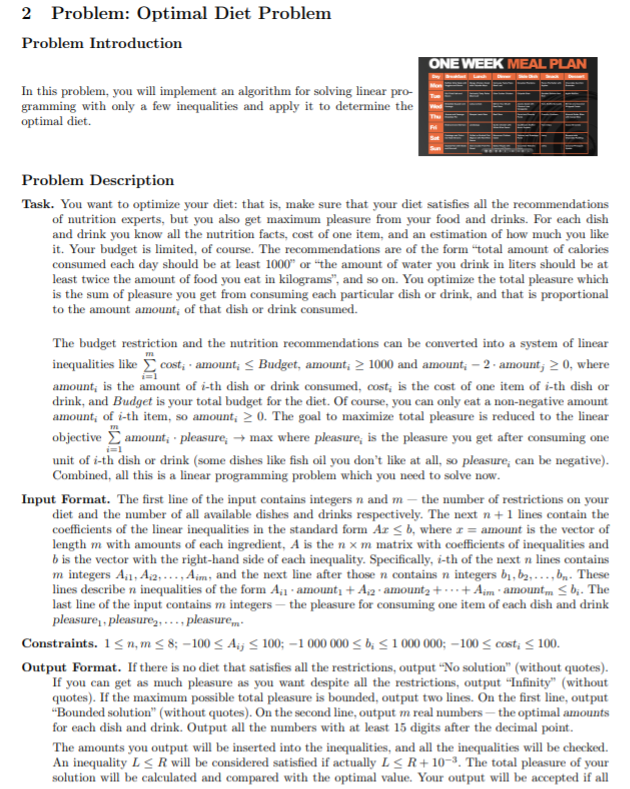

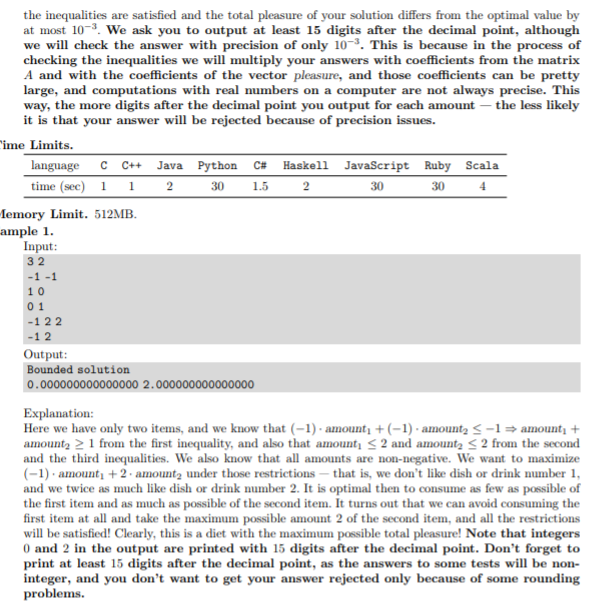

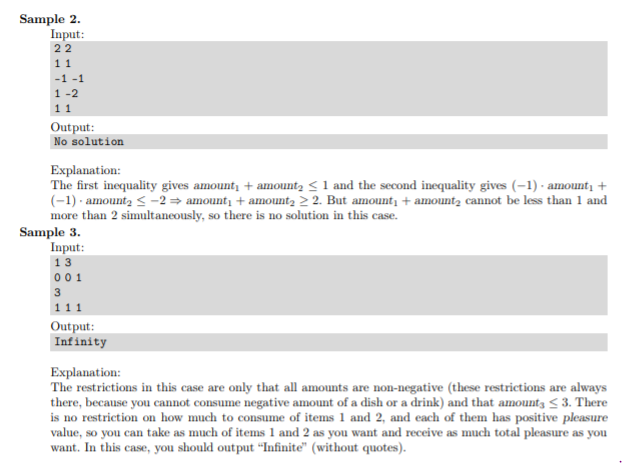

In [ ]:

# python3
from sys import stdin
import copy
import numpy as np

VeryBigNumber = 1e9


class Equation:
    def __init__( self, a, b ):
        self.a = a
        self.b = b

class Position:
    def __init__( self, column, row ):
        self.column = column
        self.row = row


def Prime_element( a, used_rows, used_columns ):
    mm = len(a)
    pivot_element = Position(0, 0)
    while used_rows[pivot_element.row]:
        pivot_element.row += 1
    while used_columns[pivot_element.column]:
        pivot_element.column += 1
    while 0 == a[pivot_element.row][pivot_element.column] or used_rows[pivot_element.row]:
        pivot_element.row += 1
        if pivot_element.row > mm - 1:
            return False, None
    return True, pivot_element


def SwapLines( a, b, used_rows, pivot_element ):
    a[pivot_element.column], a[pivot_element.row] = a[pivot_element.row], a[pivot_element.column]
    b[pivot_element.column], b[pivot_element.row] = b[pivot_element.row], b[pivot_element.column]
    used_rows[pivot_element.column], used_rows[pivot_element.row] = used_rows[pivot_element.row], used_rows[
        pivot_element.column]
    pivot_element.row = pivot_element.column


def ProcessPivotElement( a, b, pivot_element ):
    n = len(a)
    mm = len(a[pivot_element.row])
    scale = a[pivot_element.row][pivot_element.column]
    for j in range(mm):
        a[pivot_element.row][j] /= scale
    b[pivot_element.row] /= scale
    for i in range(n):
        if i != pivot_element.row:
            scale = a[i][pivot_element.column]
            for j in range(pivot_element.column, n):
                a[i][j] -= a[pivot_element.row][j] * scale
            b[i] -= b[pivot_element.row] * scale


def MarkPivotElementUsed( pivot_element, used_rows, used_columns ):
    used_rows[pivot_element.row] = True
    used_columns[pivot_element.column] = True


def SolveEquation( equation ):
    a = equation.a
    b = equation.b
    size = len(a)

    used_columns = [False] * size
    used_rows = [False] * size
    for step in range(size):
        solved, pivot_element = Prime_element(a, used_rows, used_columns)
        if not solved:
            return False, None
        SwapLines(a, b, used_rows, pivot_element)
        ProcessPivotElement(a, b, pivot_element)
        MarkPivotElementUsed(pivot_element, used_rows, used_columns)

    return True, b


def addEquations( n, mm, A, b, Big_number ):
    for i in range(mm):
        e = [0.0] * mm
        e[i] = -1.0
        A.append(e)
        b.append(0.0)
    A.append([1.0] * mm)
    b.append(Big_number)


def checkResult( n, mm, A, b, c, result, lastEquation, ans, bestScore ):
    for r in result:
        if r < -1e-3:
            return False, ans, bestScore
    for i in range(n):
        r = 0.0
        for j in range(mm):
            r += A[i][j] * result[j]
        if r > b[i] + 1e-3:
            return False, ans, bestScore
    score = 0.0
    for j in range(mm):
        score += c[j] * result[j]
    if score <= bestScore:
        return False, ans, bestScore
    else:
        if lastEquation:
            return True, 1, score
        else:
            return True, 0, score


def solve_diet_problem( n, mm, A, b, c, Big_number=VeryBigNumber ):
    addEquations(n, mm, A, b, Big_number)
    # print(A, b)
    l = n + mm + 1
    ans = -1
    bestScore = -float('inf')
    bestResult = None
    for x in range(2 ** l):
        usedIndex = [i for i in range(l) if ((x / 2 ** i) % 2) // 1 == 1]
        if len(usedIndex) != mm:
            continue
        lastEquation = False
        if usedIndex[-1] == l - 1:
            lastEquation = True
        As = [A[i] for i in usedIndex]
        bs = [b[i] for i in usedIndex]
        # print(As, bs)
        solved, result = SolveEquation(copy.deepcopy(Equation(As, bs)))
        # print(As, bs, result)
        if solved:
            isAccepted, ans, bestScore = checkResult(n, mm, A, b, c, result, lastEquation, ans, bestScore)
            if isAccepted:
                bestResult = result
    # print(A)
    return [ans, bestResult]


def solve_diet_problem0( n, mm, A, b, c ):
    # addEquations(n, mm, A, b, VeryBigNumber)
    res = linprog(-np.array(c), A, b)
    if 3 == res.status:
        ans = 1
        x = None
    elif 0 == res.status:
        ans = 0
        x = list(res.x)
    else:
        ans = -1
        x = None
    return ans, x


n, mm = list(map(int, stdin.readline().split()))
A = []
for i in range(n):
    A += [list(map(int, stdin.readline().split()))]
b = list(map(int, stdin.readline().split()))
c = list(map(int, stdin.readline().split()))

anst, ansx = solve_diet_problem(n, mm, A, b, c)

if anst == -1:
    print("No solution")
if anst == 0:
    print("Bounded solution")
    print(' '.join(list(map(lambda x: '%.18f' % x, ansx))))
if anst == 1:
    print("Infinity")